In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's create a simple 1D function (Custom Loss Function)
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

In [4]:
def draw_function(loss_function,a=None, b=None, c=None, d=None):
  # Plot the function
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel(''); ax.set_ylabel('')

    """a,b,c,d가 모두 있어야 그림을 그리기 시작한다"""
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()

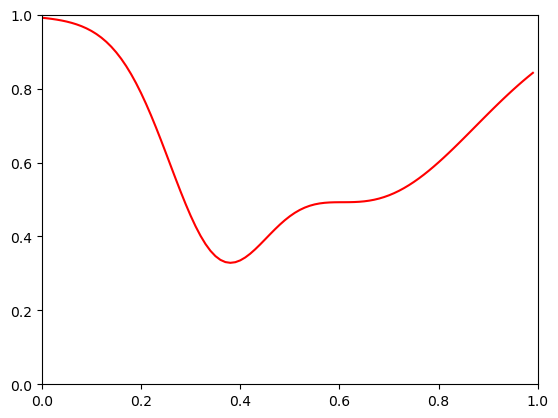

'Now lets create a line search procedure to find the minimum in the range 0,1'

In [6]:
# Draw this function
draw_function(loss_function)
     
"""Now lets create a line search procedure to find the minimum in the range 0,1"""


In [12]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter  =0;

    """Binary Search
    최솟값 후보 중 b와 c의 거리가 충분히 가까워지면 그 지점이 최솟값이므로 시행을 멈춘다."""
    
    while np.abs(b-c) > thresh and n_iter < max_iter: 
        n_iter = n_iter+1

        """Initial point에 따라 다른 함숫값들을 저장"""
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
            draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
        """Object : Find Global Minimum in 1D search"""
        
        # Rule #1 If the HEIGHT at point A is less the HEIGHT at points B, C, and D then halve values of B, C, and D 
        """argmin(loss)가 a인 경우, b, c, d를 a쪽으로 가깝게 당겨온다 => 더 이상 a가 최솟값이 아닐 때까지"""
        if lossa < lossb and lossa < lossc and lossa < lossd:
            b = (a + b) / 2
            c = (a + c) / 2
            d = (a + d) / 2
            continue
        """이제 더 이상 a가 최솟값이 아니고, 최소값은 b,c중 하나이다."""
        
        # Rule #2 If the HEIGHT at point b is less than the HEIGHT at point c then
        """b에서의 함숫값이 c에서의 함숫값보다 작으면"""
        if lossb < lossc:
            d = c """c~d까지의 구간은 필요 없기 때문에 버린다. (d가 c쪽으로 이동한다)"""
            """관찰의 범위를 처음과 끝 부분의 3등분을 해서 점점 좁혀나간다"""
            b = a + (d - a) / 3 #a와 d의 1:2 내분점을 새로운 b로 
            c = a + 2 * (d - a) / 3 #a와 d의 2:1 내분점을 새로운 c로
            continue

        # Rule #3 If the HEIGHT at point c is less than the HEIGHT at point b then
        #                     then point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        # TODO REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        # Rule #3
        if lossc < lossb:
            a = b """a~b까지의 구간은 필요 없기 때문에 버린다. (a가 b쪽으로 이동한다)"""
            """관찰의 범위를 처음과 끝 부분의 3등분을 해서 점점 좁혀나간다"""
            b = a + (d - a) / 3
            c = a + 2 * (d - a) / 3
            continue
        
    """이 알고리즘은 1차원에서 최솟값을 수치적으로 찾는 알고리즘으로, 
    아직도 Python의 List에서 최솟값을 찾는 것과 같은 1D Search에서는 자주 사용한다.
    그러나 Deep Learning에서 1차원인 경우는 절대 없으므로, 사용하지 않는다. """
    # TODO -- FINAL SOLUTION IS AVERAGE OF B and C
    # REPLACE THIS LINE
    
    """B와 C 중 어떤 게 최솟값인지 모르기 때문에, 평균을 내서 보수적으로 값을 이용한다."""
    soln = (b + c) / 2 


    return soln
     

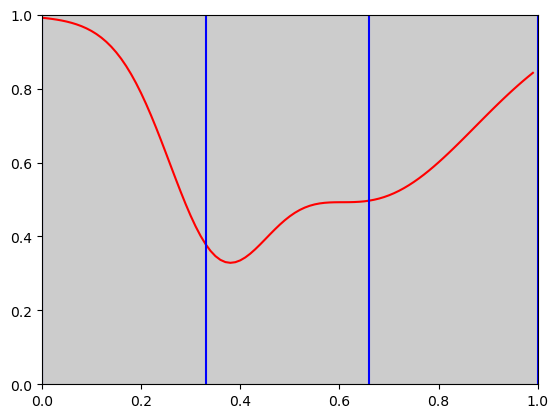

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


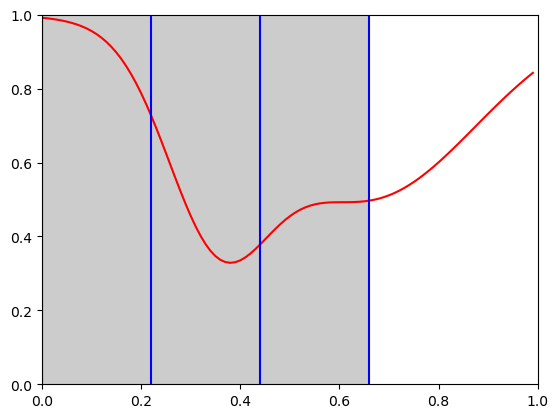

Iter 2, a=0.000, b=0.220, c=0.440, d=0.660


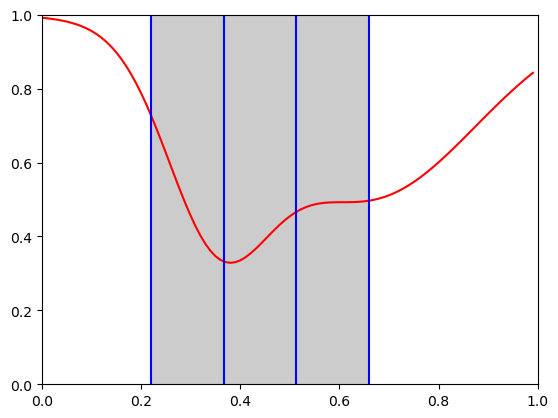

Iter 3, a=0.220, b=0.367, c=0.513, d=0.660


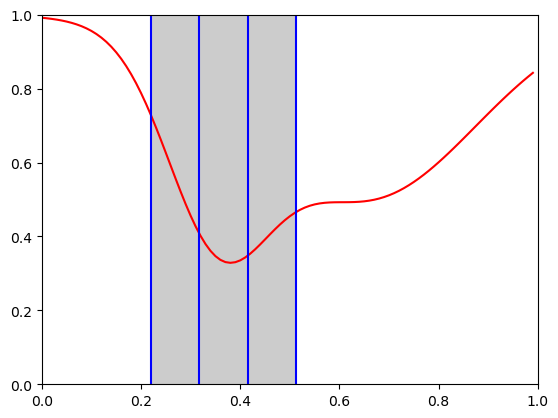

Iter 4, a=0.220, b=0.318, c=0.416, d=0.513


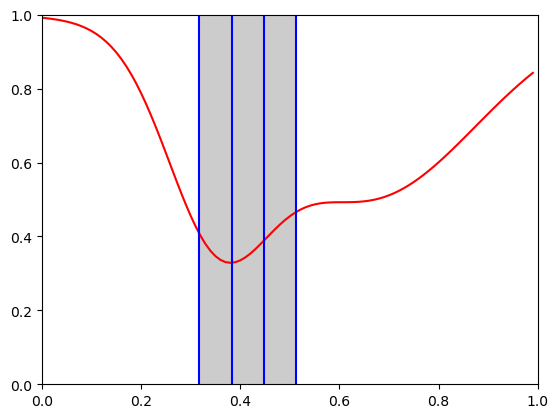

Iter 5, a=0.318, b=0.383, c=0.448, d=0.513


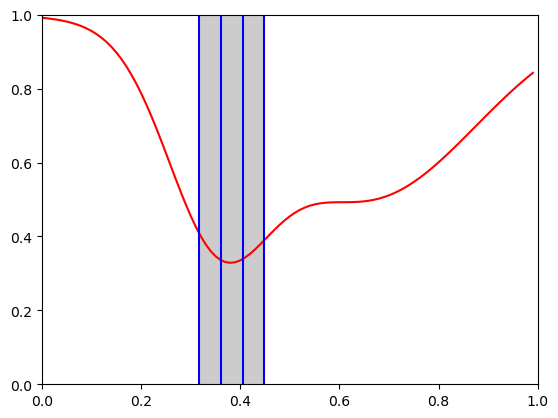

Iter 6, a=0.318, b=0.361, c=0.405, d=0.448


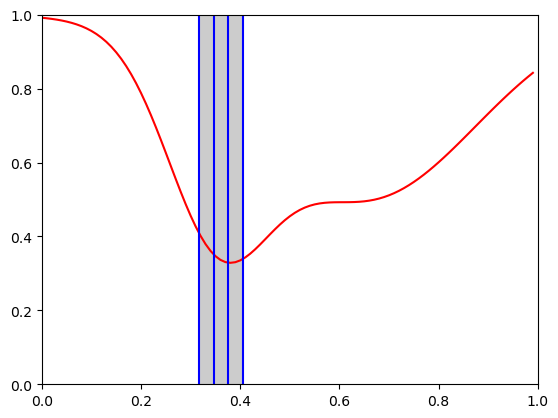

Iter 7, a=0.318, b=0.347, c=0.376, d=0.405


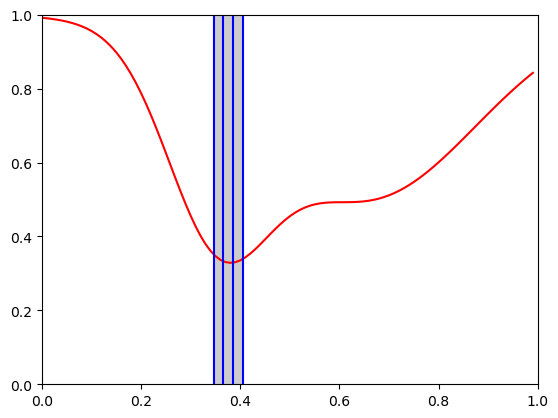

Iter 8, a=0.347, b=0.366, c=0.385, d=0.405


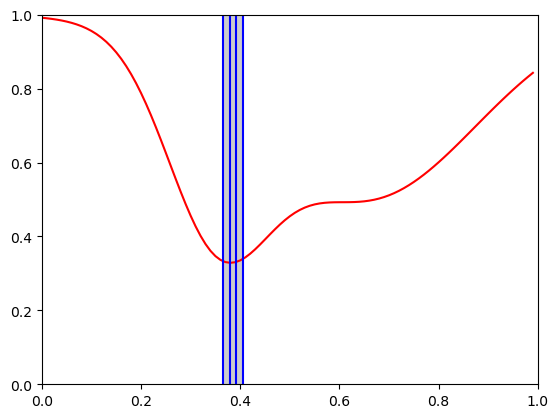

Iter 9, a=0.366, b=0.379, c=0.392, d=0.405


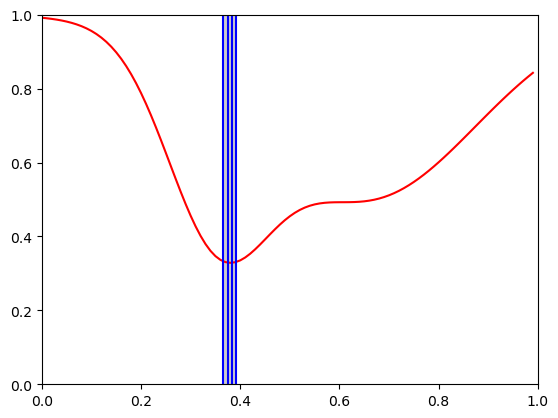

Iter 10, a=0.366, b=0.375, c=0.383, d=0.392
Soln = 0.383, loss = 0.329


In [13]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))